##  (오늘의 실습)
* 영화를 하나 정해서 리뷰를 50페이지 정도를 가지고 와서 csv파일에 내용을 저장한다.
* 해당 csv 파일을 불러와 워드 클라우드 시각화를 수행한다.
* slack 에 한 내용(capture 사진)을 공유한다.
* 구글 드라이브에 체크를 해 주세요.(실습)

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import time

In [4]:
basic_url = "https://movie.naver.com/movie/point/af/list.nhn?st=mcode&sword=13500&target"

In [6]:
comments_allpage = []
cnt = 0

for i in range(1,51):
    url = basic_url + str(i)
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    comment_all = soup.find_all('td', class_='title') 
    
    for one in comment_all:
        one_com = list(one.children)[6].strip()
        comments_allpage.append(one_com)
        
    time.sleep(3)
    
print(len(comments_allpage))

500


In [7]:
import pandas as pd
import os

In [8]:
dict_doc = {"text":comments_allpage}
doc = pd.DataFrame(dict_doc)
doc.to_csv("0616 실습_쥬라기공원리뷰.csv", index=False)

os.listdir(os.getcwd())

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 '0614_class_comment.html',
 '0614_class_CSS 실습.html',
 '0614_class_CSS.css',
 '0614_class_CSS.html',
 '0614_class_heading.html',
 '0614_class_id.html',
 '0614_class_list.html',
 '0614_class_table.html',
 '0616 실습_쥬라기공원리뷰.csv',
 '210616 BeautifulSoup.ipynb',
 '210616 수업 자율 과제(네이버금융_상한가) 추출.ipynb',
 '210616_스파이더맨리뷰.csv',
 '210617 네이버 댓글 추출.ipynb',
 '210617 네이버 주식 정보.ipynb',
 '210617 실습 과제(네이버영화_리뷰) 추출.ipynb',
 'data',
 'html1.html',
 'README.md',
 '해변.jpg',
 '회사명과웹사이트.csv']

In [9]:
from wordcloud import WordCloud

import numpy as np
from PIL import Image

In [10]:
f = open("0616 실습_쥬라기공원리뷰.csv", encoding="utf-8")
text = f.read()
f.close()

In [11]:
from matplotlib import rc
rc("font", family="NanumGothic")

(-0.5, 399.5, 199.5, -0.5)

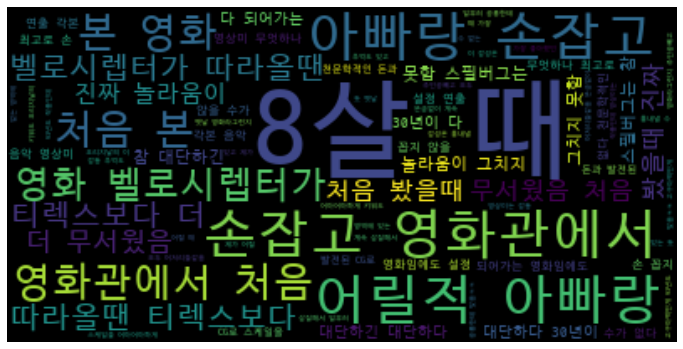

In [28]:
wcloud = WordCloud('./data/D2Coding.ttf',
                  max_words=3000,
                  relative_scaling = 1).generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")

## 네이버 영화 정보 가져오기

In [29]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [30]:
url = "https://movie.naver.com/movie/running/current.nhn"
page = urlopen(url)
soup = BeautifulSoup(page, 'lxml')

## 01. 영화 제목 가져오기

In [53]:
list1 = soup.find_all('dt', class_='tit')
list1[0].find("a").text  #list1[] index값 변화시켜 하나씩 잘 가져오는지 먼저 확인.

'크루엘라'

In [56]:
for one in list1:
    print(one.find("a").text) #영화 제목 전체 가져오기 확인 후 list에 담아줘서 출력

크루엘라
콰이어트 플레이스 2
루카
극장판 귀멸의 칼날: 무한열차편
여고괴담 여섯번째 이야기 : 모교
컨저링 3: 악마가 시켰다
캐시트럭
분노의 질주: 더 얼티메이트
뱅드림! 로젤리아 에피소드Ⅰ: 약속
파이프라인
아야와 마녀
클라이밍
그 여름, 가장 차가웠던
그레타 툰베리
야구소녀
노매드랜드
프로페서 앤 매드맨
혼자 사는 사람들
애플
500일의 썸머
낫아웃
썰
굴뚝마을의 푸펠
까치발
인트로덕션
레이니 데이 인 뉴욕
더 파더
#위왓치유
포겟 미 낫-엄마에게 쓰는 편지
중경삼림
사랑하고 사랑받고 차고 차이고
크루즈 패밀리: 뉴 에이지
극장판 콩순이: 장난감나라 대모험
학교 가는 길
너의 이름은.
라이더스 오브 저스티스
청춘 선거
미나리
화양연화
강변호텔
화이트 온 화이트
폭력의 그림자
쿠사마 야요이: 무한의 세계
도라에몽: 스탠바이미 2
토토리! 우리 둘만의 여름
명탐정 코난: 비색의 탄환
내겐 너무 소중한 너
강호아녀
플래시백
빅 피쉬
마세티 킬즈
실크 로드
분노의 질주
미스피츠
스쿨 오브 락(樂)
부활: 그 증거
분노
비커밍 아스트리드
쿠오바디스, 아이다
흐린 하늘에 웃다
그을린 사랑
노 게임 노 라이프 -제로-
봉쇄수도원 카르투시오
블루 재스민
서칭 포 슈가맨
소리에 놀라지 않는 사자처럼
아들의 이름으로
어른들은 몰라요
억남
가을 햇살
간츠: 오
구름의 저편, 약속의 장소
그 여름 가장 조용한 바다
그리고 삶은 계속된다
꽁치의 맛
나만 없어 고양이
나츠메 우인장: 세상과 연을 맺다
날씨의 아이
날으는 해병대
내 친구의 집은 어디인가
내언니전지현과 나
네가 내가 되었으면 좋겠다
덕구
도망친 여자
동경의 황혼
라스트 씬
러브 라이브! 선샤인!! 더 스쿨 아이돌 무비 오버 더 레인보우
러브 액츄얼리
마스터
막다른 골목의 추억
무순, 세상을 가로질러
문라이즈 킹덤
미스터 노바디
바람이 우리를 데려다 주리라
버티고
벙어리 삼룡
별을 쫓는 아이
소공녀
슈퍼노바
언어의 정원
엔딩 노트
여름날
여호
원더풀 라이프
유스
유전
은혼
은혼2: 규칙은 깨라고 있는 것
이별의 아침

In [52]:
movie_title = []

for one in list1:
    one_movie = one.find("a").text
    movie_title.append(one_movie)

movie_title

['크루엘라',
 '콰이어트 플레이스 2',
 '루카',
 '극장판 귀멸의 칼날: 무한열차편',
 '여고괴담 여섯번째 이야기 : 모교',
 '컨저링 3: 악마가 시켰다',
 '캐시트럭',
 '분노의 질주: 더 얼티메이트',
 '뱅드림! 로젤리아 에피소드Ⅰ: 약속',
 '파이프라인',
 '아야와 마녀',
 '클라이밍',
 '그 여름, 가장 차가웠던',
 '그레타 툰베리',
 '야구소녀',
 '노매드랜드',
 '프로페서 앤 매드맨',
 '혼자 사는 사람들',
 '애플',
 '500일의 썸머',
 '낫아웃',
 '썰',
 '굴뚝마을의 푸펠',
 '까치발',
 '인트로덕션',
 '레이니 데이 인 뉴욕',
 '더 파더',
 '#위왓치유',
 '포겟 미 낫-엄마에게 쓰는 편지',
 '중경삼림',
 '사랑하고 사랑받고 차고 차이고',
 '크루즈 패밀리: 뉴 에이지',
 '극장판 콩순이: 장난감나라 대모험',
 '학교 가는 길',
 '너의 이름은.',
 '라이더스 오브 저스티스',
 '청춘 선거',
 '미나리',
 '화양연화',
 '강변호텔',
 '화이트 온 화이트',
 '폭력의 그림자',
 '쿠사마 야요이: 무한의 세계',
 '도라에몽: 스탠바이미 2',
 '토토리! 우리 둘만의 여름',
 '명탐정 코난: 비색의 탄환',
 '내겐 너무 소중한 너',
 '강호아녀',
 '플래시백',
 '빅 피쉬',
 '마세티 킬즈',
 '실크 로드',
 '분노의 질주',
 '미스피츠',
 '스쿨 오브 락(樂)',
 '부활: 그 증거',
 '분노',
 '비커밍 아스트리드',
 '쿠오바디스, 아이다',
 '흐린 하늘에 웃다',
 '그을린 사랑',
 '노 게임 노 라이프 -제로-',
 '봉쇄수도원 카르투시오',
 '블루 재스민',
 '서칭 포 슈가맨',
 '소리에 놀라지 않는 사자처럼',
 '아들의 이름으로',
 '어른들은 몰라요',
 '억남',
 '가을 햇살',
 '간츠: 오',
 '구름의 저편, 약속의 장소',
 '그 여름 가장 조용한 바다',
 '그리고 삶은 계속된다',
 '꽁치의 맛',


## 02. 네이버 영화 평점 가져오기 

## 03. 네이버 영화 참여 인원 가져오기

## 04. 네이버 영화 예매율 가져오기

## 05. 네이버 영화 - 감독 가져오기